# Neural Networks - Weight Initialization
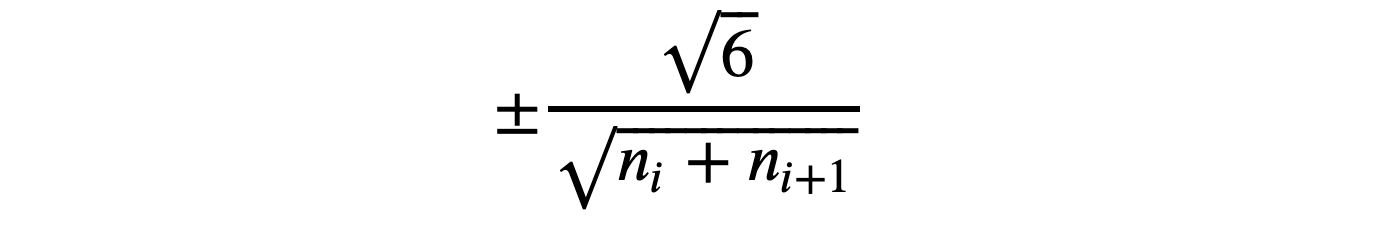

# Topics
* Single Layer Models & Weight Initializations
* Deep Models & Weights
* Deep Models & DeepReplay
* Weights & Learning

# Setup

In [1]:
#!pip install deepreplay

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
import keras

from keras import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Softmax

from keras.utils import to_categorical
from keras.initializers import RandomNormal

from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_plots
from deepreplay.datasets.ball import load_data as dr_load_data
from keras.initializers import normal

In [188]:
# Ignore TensorFlow warnings
# Ignore TensorFlow warnings
import warnings
warnings.filterwarnings('ignore')

tf.logging.set_verbosity(tf.logging.ERROR)

# Data

In [4]:
mnist = keras.datasets.mnist.load_data()

In [5]:
(X_train, y_train), (X_test, y_test) = mnist

In [6]:
print(f'Training Images {X_train.shape}, Labels {y_train.shape}')
print(f'Testing  Images {X_test.shape}, Labels {y_test.shape}')

Training Images (60000, 28, 28), Labels (60000,)
Testing  Images (10000, 28, 28), Labels (10000,)


## Example

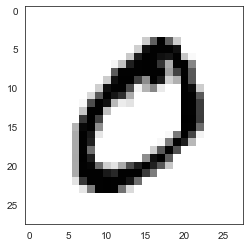

In [7]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

## Data
* Flatten and scale the data
* We lose information when flattening

In [8]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float32')

In [9]:
X_train /= 255
X_test  /= 255

## Labels

In [10]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# Parameter Values

In [11]:
batch_size = 64
epochs     = 20
neurons    = 64
activation = 'relu'

# Metrics

In [12]:
resultsDF = pd.DataFrame(columns=['Loss', 'Accuracy'])

## Plotting Helpers

In [145]:
def plot_accuracy(history, color='b'):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, 'bo', color=color, label='Train')
    plt.plot(epochs, val_acc, 'b', color=color, label='Validation')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
def plot_loss(history, color='b'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, 'bo', color=color, label='Train')
    plt.plot(epochs, val_loss, 'b', color=color, label='Validation')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
def plot_performance(history, color='b'):
    fig, ax = plt.subplots(figsize=(12,8))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    ax = plt.subplot(2, 1, 1)
    plt.plot(epochs, acc, 'bo', color=color, label='Train')
    plt.plot(epochs, val_acc, 'b', color=color, label='Validation')
    plt.title('Training & Validation Accuracy')
    plt.ylabel('Accuracy')
    ax.legend()
    
    ax = plt.subplot(2, 1, 2)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)    
    plt.plot(epochs, loss, 'bo', color=color, label='Train')
    plt.plot(epochs, val_loss, 'b', color=color, label='Validation')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Weight Initialization
* Do the initial weights make a difference in learning? 

## Weight Plot

In [154]:
def hist_weights(layer):
    weights, biases = layer.get_weights()
    weights = weights.flatten()
    print(f'Weights Mean {weights.mean():.3f} Std {weights.std():.3f}')
    plt.figure(figsize=(8,6))
    plt.hist(weights)
    plt.title('Weights Distribution')
    plt.show()
    
def plot_weights(starting, ending):
    starting_w = starting.flatten()
    ending_w = ending.flatten()
    plt.figure(figsize=(8,6))
    sns.kdeplot(starting_w, label=f'Starting Weights')
    sns.kdeplot(ending_w, label=f'Ending Weights')
    plt.title('Weights Distribution')
    plt.show()

# Zeros
* Setting initial weights to zero

## Model

In [133]:
model = Sequential()
model.add(Dense(neurons, activation=activation, input_shape=(784, ), 
                kernel_initializer='zeros', bias_initializer='zeros'))
model.add(Dense(10, activation='softmax'))

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [137]:
starting_w, starting_b = model.layers[0].get_weights()
history_zeros = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

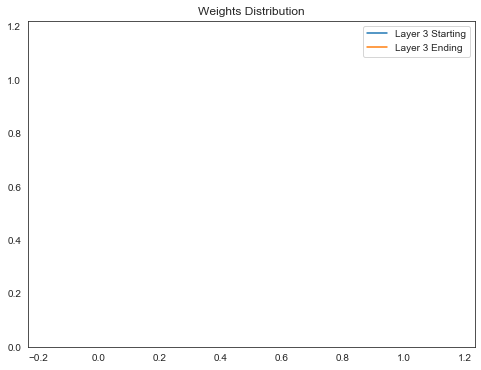

In [142]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [143]:
loss_zeros, accuracy_zeros = model.evaluate(X_test, y_test)
resultsDF.loc['Zeros']= [loss_zeros, accuracy_zeros]
print(f'Test Loss {loss_zeros}, Accuracy {accuracy_zeros}')

10000/10000 [==============================] - 0s 39us/step
Test Loss 2.3010128101348877, Accuracy 0.1135


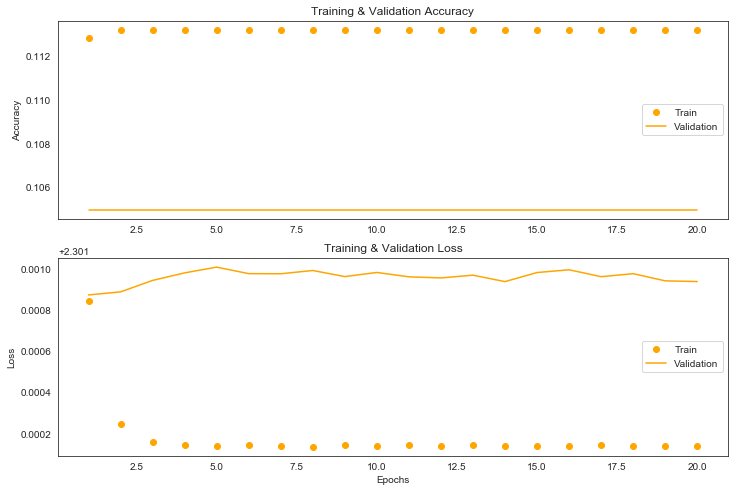

In [146]:
plot_performance(history_zeros, color='orange')

# Ones
* Setting initial weights to all 1s

## Model

In [147]:
model = Sequential()
model.add(Dense(neurons, activation=activation, input_shape=(784, ), 
                kernel_initializer='ones', bias_initializer='ones'))
model.add(Dense(10, activation='softmax'))

In [148]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [150]:
starting_w, starting_b = model.layers[0].get_weights()
history_ones = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

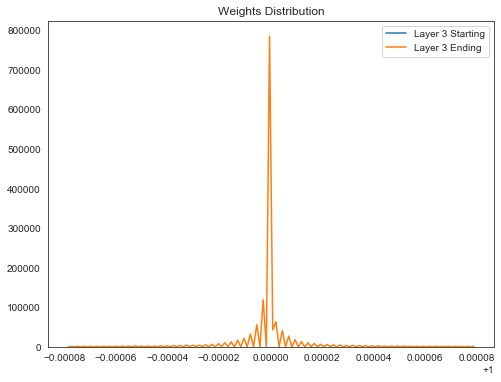

In [151]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [152]:
loss_ones, accuracy_ones = model.evaluate(X_test, y_test)
resultsDF.loc['Ones']= [loss_ones, accuracy_ones]
print(f'Test Loss {loss_ones}, Accuracy {accuracy_ones}')

10000/10000 [==============================] - 0s 30us/step
Test Loss 14.548192700195312, Accuracy 0.0974


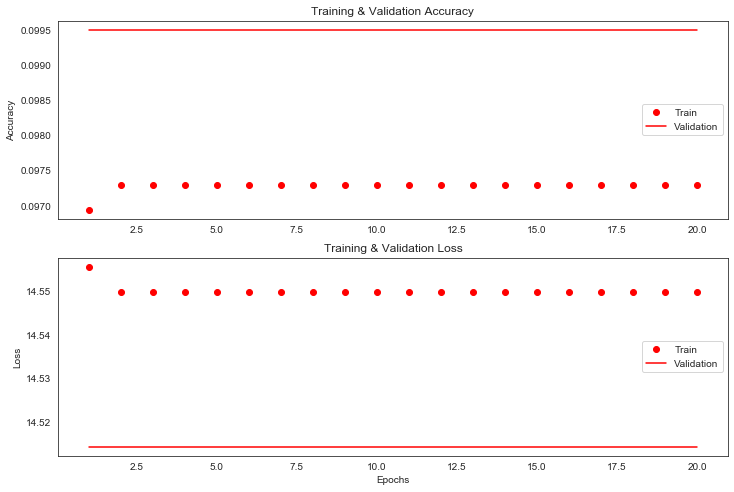

In [153]:
plot_performance(history_ones, color='red')

# Random - Normal(0,1)
* Randomly setting weights
* Mean 0, Std 1.0

## Model

In [155]:
model = Sequential()
weight_initializer = RandomNormal(stddev=1.0)
model.add(Dense(neurons, activation=activation, input_shape=(784, ),
                kernel_initializer=weight_initializer, bias_initializer='zeros'))
model.add(Dense(10, activation='softmax'))

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [158]:
starting_w, starting_b = model.layers[0].get_weights()
history_random = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

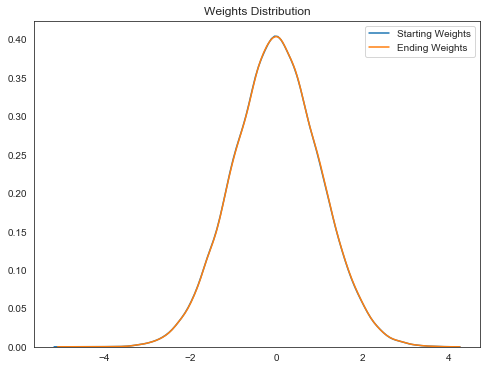

In [159]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [160]:
loss_random, accuracy_random = model.evaluate(X_test, y_test)
resultsDF.loc['Random N(0,1)']= [loss_random, accuracy_random]
print(f'Test Loss {loss_random}, Accuracy {accuracy_random}')

10000/10000 [==============================] - 0s 30us/step
Test Loss 0.4222479131042957, Accuracy 0.8696


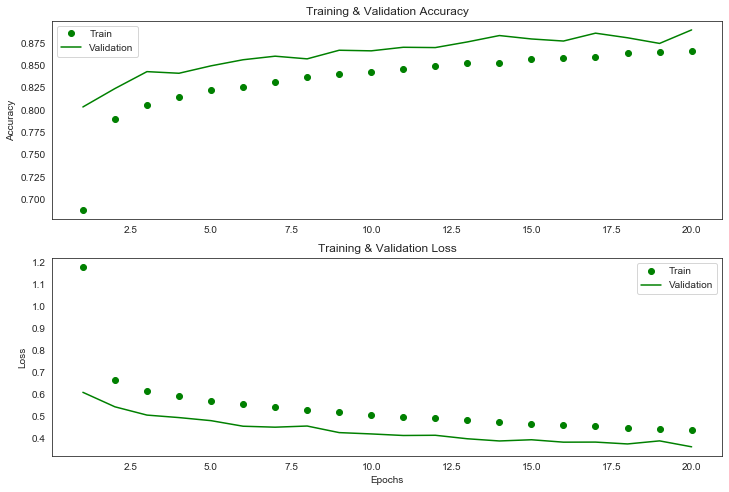

In [161]:
plot_performance(history_random, color='green')

# Random - Normal(0, 0.1)
* Randomly setting weights
* Mean 0, Std 0.1 (Smaller standard deviation)

In [162]:
model = Sequential()
weight_initializer = RandomNormal(stddev=0.1)
model.add(Dense(neurons, activation=activation, input_shape=(784, ),
                kernel_initializer=weight_initializer, bias_initializer='zeros'))
model.add(Dense(10, activation='softmax'))

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [165]:
starting_w, starting_b = model.layers[0].get_weights()
history_random_small = model.fit(X_train, y_train, validation_split=0.1, 
                                 epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

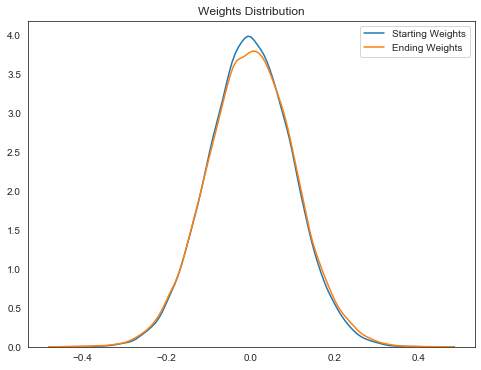

In [166]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [167]:
loss_random_small, accuracy_random_small = model.evaluate(X_test, y_test)
resultsDF.loc['Random N(0, 0.1)']= [loss_random_small, accuracy_random_small]
print(f'Test Loss {loss_random_small}, Accuracy {accuracy_random_small}')

10000/10000 [==============================] - 0s 34us/step
Test Loss 0.1855781386256218, Accuracy 0.9465


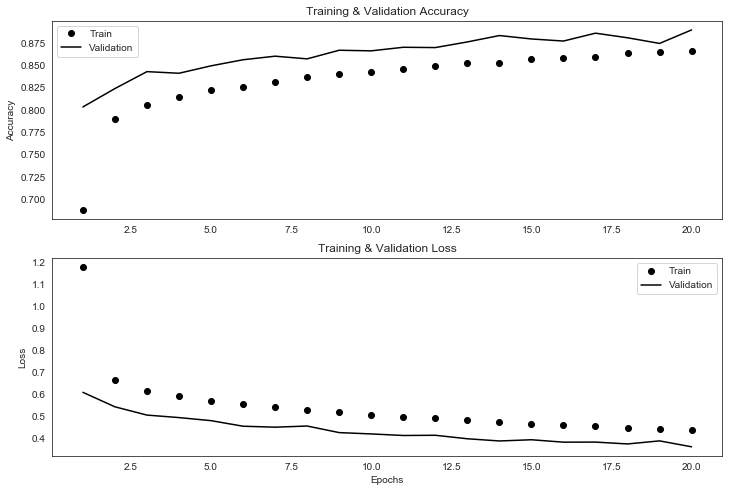

In [168]:
plot_performance(history_random, color='black')

# Glorot / Xavier
* Understanding the difficulty of training deep feedforward neural networks
* http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf


## Model

In [169]:
model = Sequential()
model.add(Dense(neurons, activation=activation, input_shape=(784, ),
                kernel_initializer='glorot_uniform', bias_initializer='zero'))
model.add(Dense(10, activation='softmax'))

In [170]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [171]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [172]:
starting_w, starting_b = model.layers[0].get_weights()
history_glorot = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

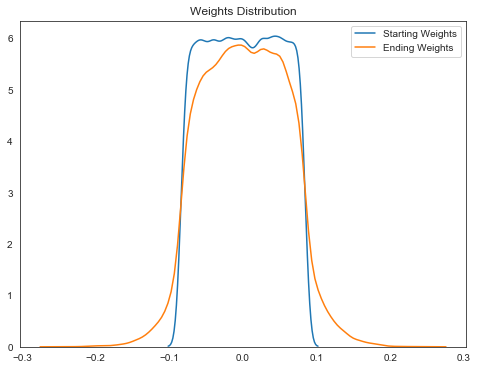

In [173]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [174]:
loss_glorot, accuracy_glorot = model.evaluate(X_test, y_test)
resultsDF.loc['Glorot']= [loss_glorot, accuracy_glorot]
print(f'Test Loss {loss_glorot}, Accuracy {accuracy_glorot}')

10000/10000 [==============================] - 0s 31us/step
Test Loss 0.18139746239036322, Accuracy 0.9481


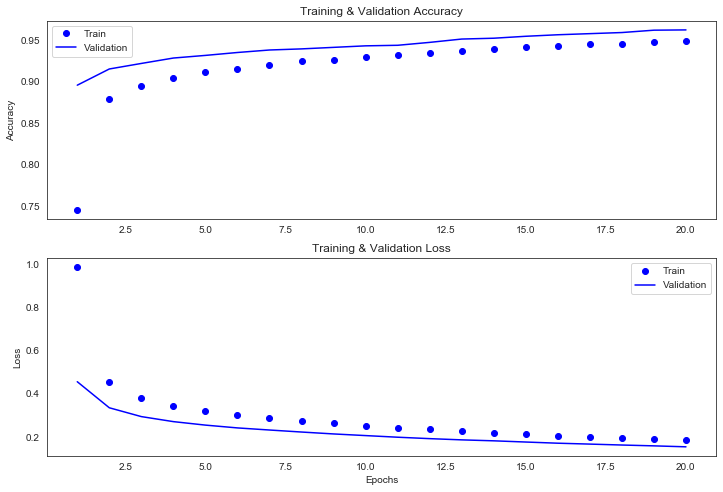

In [175]:
plot_performance(history_glorot)

# Kaiming He

## Model

In [176]:
model = Sequential()
model.add(Dense(neurons, activation=activation, input_shape=(784, ),
               kernel_initializer='he_uniform', bias_initializer='zeros'))
model.add(Dense(10, activation='softmax'))

In [177]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Weights & Training

In [179]:
starting_w, starting_b = model.layers[0].get_weights()
history_he = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)
ending_w, ending_b  = model.layers[0].get_weights()

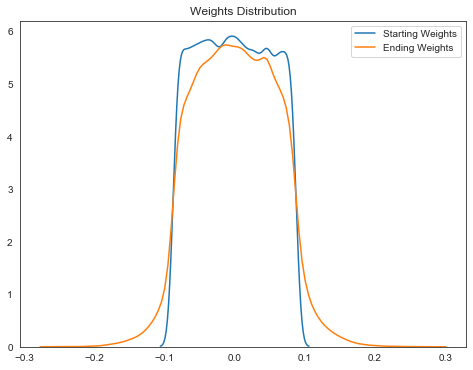

In [180]:
plot_weights(starting_w, ending_w)

## Loss & Accuracy

In [181]:
loss_he, accuracy_he = model.evaluate(X_test, y_test)
resultsDF.loc['He']= [loss_he, accuracy_he]
print(f'Test Loss {loss_he}, Accuracy {accuracy_he}')

10000/10000 [==============================] - 0s 30us/step
Test Loss 0.18500767409652472, Accuracy 0.9457


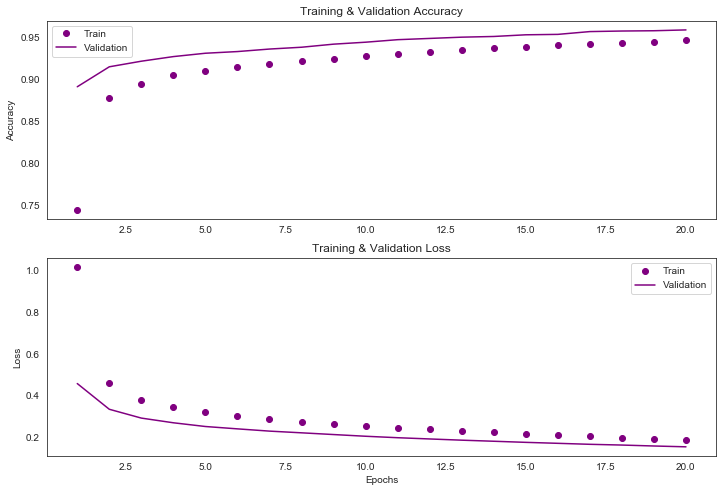

In [182]:
plot_performance(history_he, color='purple')

# Comparison

In [183]:
resultsDF

,Loss,Accuracy
Zeros,2.301013,0.1135
Ones,14.548193,0.0974
"Random N(0,1)",0.422248,0.8696
"Random N(0, 0.1)",0.185578,0.9465
Glorot,0.181397,0.9481
He,0.185008,0.9457


## Loss
* It took a number of epochs for our deep network to make progress

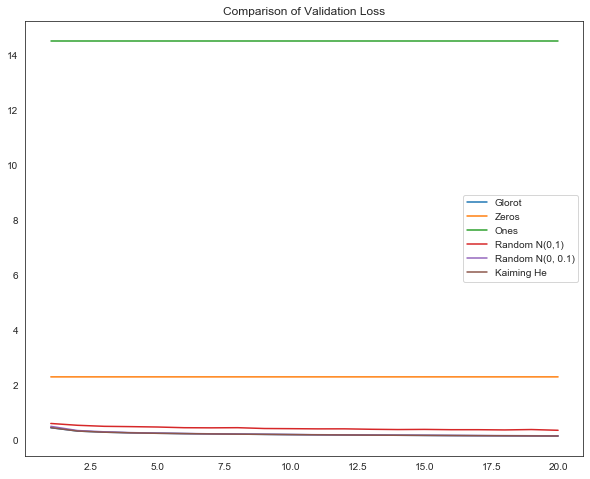

In [184]:
glorot       = history_glorot.history['val_loss']
zeros        = history_zeros.history['val_loss']
ones         = history_ones.history['val_loss']
random       = history_random.history['val_loss'] 
random_small = history_random_small.history['val_loss'] 
he           = history_he.history['val_loss'] 
ranged  = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, glorot, label='Glorot')
plt.plot(ranged, zeros, label='Zeros')
plt.plot(ranged, ones, label='Ones')
plt.plot(ranged, random, label='Random N(0,1)')
plt.plot(ranged, random_small, label='Random N(0, 0.1)')
plt.plot(ranged, he, label='Kaiming He')
plt.title('Comparison of Validation Loss')
plt.legend()
plt.show()

## Accuracy

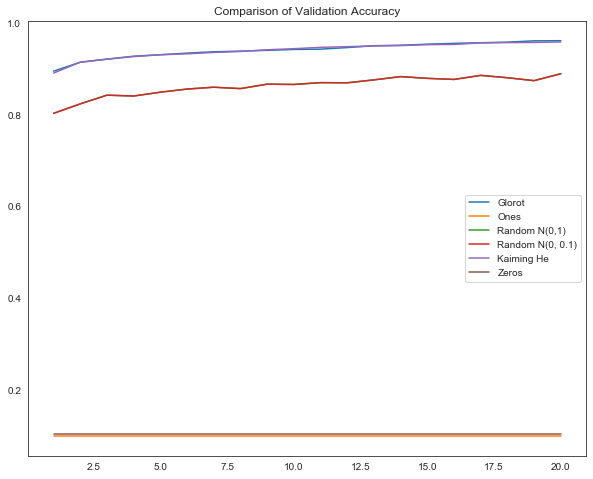

In [185]:
glorot       = history_glorot.history['val_acc']
zeros        = history_zeros.history['val_acc']
ones         = history_ones.history['val_acc']
random       = history_random.history['val_acc']   
random_small = history_random.history['val_acc']         
he           = history_he.history['val_acc'] 
ranged       = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, glorot, label='Glorot')
plt.plot(ranged, ones, label='Ones')
plt.plot(ranged, random, label='Random N(0,1)')
plt.plot(ranged, random_small, label='Random N(0, 0.1)')
plt.plot(ranged, he, label='Kaiming He')
plt.plot(ranged, zeros, label='Zeros')
plt.title('Comparison of Validation Accuracy')
plt.legend()
plt.show()

# Insights
* Learning is sensitive to the standard deviation of the layer weights
* Glorot (Xavier) uses the number of incoming / outcoming layers in its formula
* Kaiming uses the incoming layers and makes an adjustment for Relu
* Uniform initialization tends to lead to better gradients
* Keras uses Glorot - Uniform by default

# Deep Network
* Do the insights from a shallow network hold up in a deep network? 
* How do weights respond in deeper architectures?

## Model

In [74]:
model = Sequential()
model.add(Dense(neurons, activation=activation, input_shape=(784, )))
model.add(Dense(neurons, activation=activation))
model.add(Dense(neurons, activation=activation))
model.add(Dense(neurons, activation=activation))
model.add(Dense(10, activation='softmax'))

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

## Initial Layer Density

Text(0.5, 1.0, 'Weight Density by Layer - Relu - Glorot')

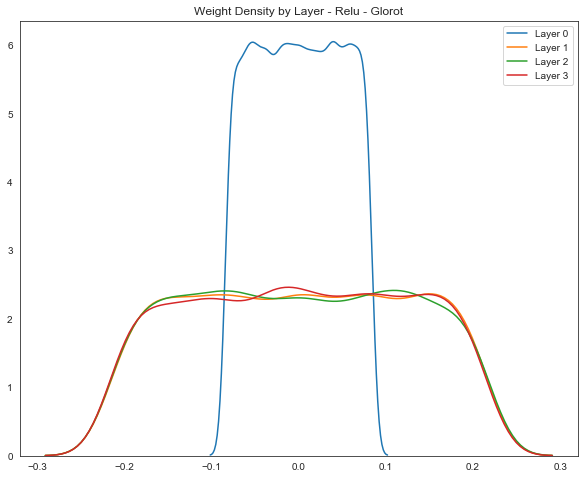

In [77]:
plt.figure(figsize=(10,8))
for layer in range(0, 4):
    weights, biases = model.layers[layer].get_weights()
    sns.kdeplot(weights.flatten(), label=f'Layer {layer}')
plt.title('Weight Density by Layer - Relu - Glorot')

## Fit Model

In [78]:
model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=0)

## Accuracy & Loss

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss {loss}, Accuracy {accuracy}')

10000/10000 [==============================] - 0s 14us/step
Test Loss 0.11218423953671008, Accuracy 0.9661


## Final Layer Density

Text(0.5, 1.0, 'Weight Density by Layer - Relu - Glorot')

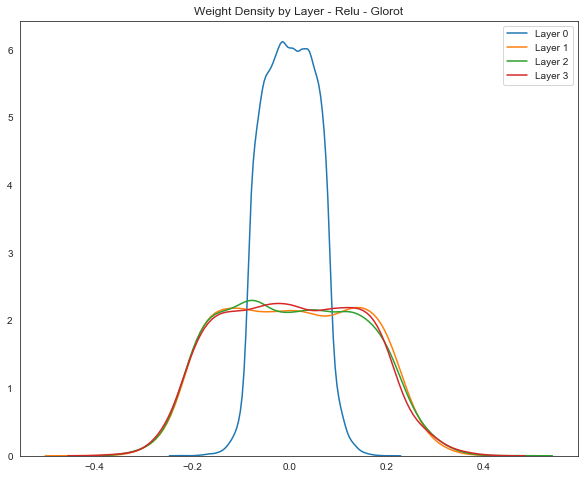

In [80]:
plt.figure(figsize=(10,8))
for layer in range(0, 4):
    weights, biases = model.layers[layer].get_weights()
    sns.kdeplot(weights.flatten(), label=f'Layer {layer}')
plt.title('Weight Density by Layer - Relu - Glorot')

# Deep Network - Relu

In [81]:
def buildModel(neurons=64, activation='relu', init='glorot_normal'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, kernel_initializer=init, input_shape=(784, )))
    model.add(Dense(neurons, activation=activation, kernel_initializer=init))
    model.add(Dense(neurons, activation=activation, kernel_initializer=init))
    model.add(Dense(neurons, activation=activation, kernel_initializer=init))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=batch_size, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss {loss}, Accuracy {accuracy}')
    return model, history

## Relu - Random N(0,1)
* Accuracy is no better than random
* The initialization N(0,1) worked suboptimally for a shallow network, and fails to learn in the deep network

10000/10000 [==============================] - 0s 15us/step
Test Loss 14.548192700195312, Accuracy 0.0974


Text(0.5, 1.0, 'Weight Density by Layer - Relu & Random 1.0')

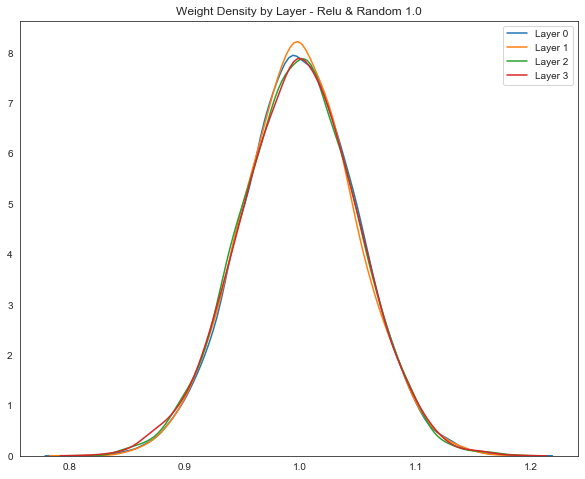

In [82]:
model, history_relu_random1 = buildModel(activation='relu', init=RandomNormal(1.0))
plt.figure(figsize=(10,8))
for layer in range(0, 4):
    weights, biases = model.layers[layer].get_weights()
    sns.kdeplot(weights.flatten(), label=f'Layer {layer}')
plt.title('Weight Density by Layer - Relu & Random 1.0')

## Relu - Random N(0, 0.1)
* Best accuracy ~ 96.93
* The initiatlization for the shallow network N(0,0.1) worked well on the deep network

10000/10000 [==============================] - 0s 15us/step
Test Loss 0.10376983362898463, Accuracy 0.9693


Text(0.5, 1.0, 'Weight Density by Layer - Relu & Random 0.1')

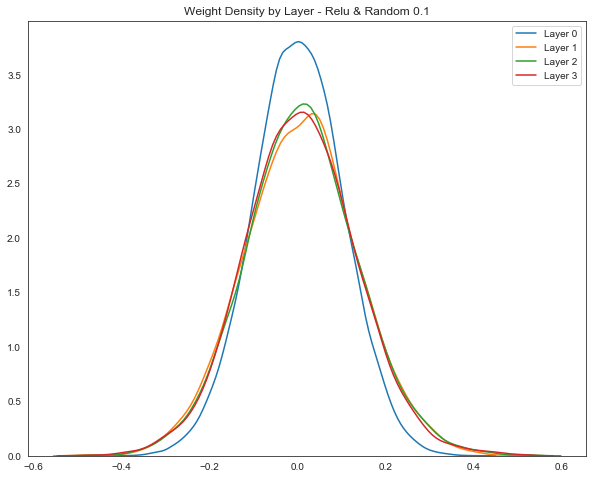

In [83]:
model, history_relu_random2 = buildModel(activation='relu', init=RandomNormal(stddev=0.1))
plt.figure(figsize=(10,8))
for layer in range(0, 4):
    weights, biases = model.layers[layer].get_weights()
    sns.kdeplot(weights.flatten(), label=f'Layer {layer}')
plt.title('Weight Density by Layer - Relu & Random 0.1')

## Relu - Random N(0.5, 0.1)
* Shifting the mean impairs learning
* Accuracy is no better than random

10000/10000 [==============================] - 0s 16us/step
Test Loss 14.538521841430665, Accuracy 0.098


Text(0.5, 1.0, 'Weight Density by Layer - Relu & Random Mean 0.5, Std 0.1')

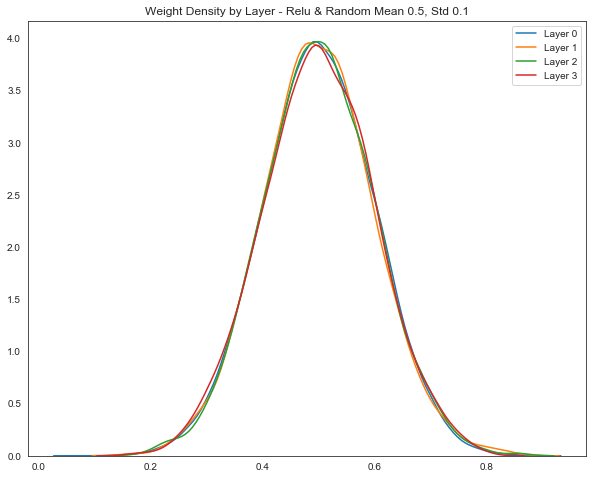

In [84]:
model, history_relu_random3 = buildModel(activation='relu', init=RandomNormal(mean=0.5, stddev=0.1))
plt.figure(figsize=(10,8))
for layer in range(0, 4):
    weights, biases = model.layers[layer].get_weights()
    sns.kdeplot(weights.flatten(), label=f'Layer {layer}')
plt.title('Weight Density by Layer - Relu & Random Mean 0.5, Std 0.1')

## Comparison Accuracy & Loss

Text(0.5, 1.0, 'Validation Accuracy by Epoch')

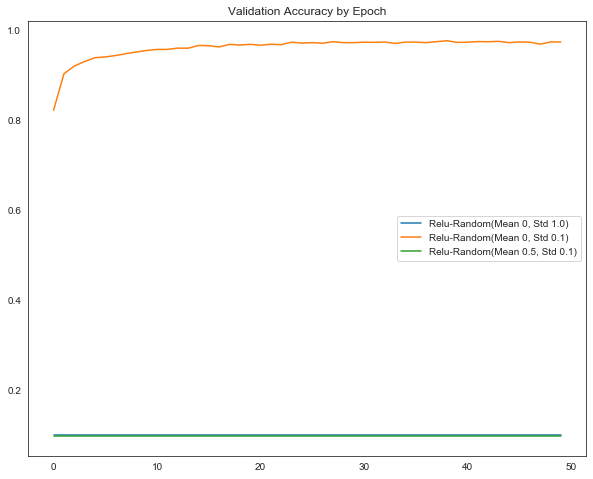

In [85]:
plt.figure(figsize=(10,8))
plt.plot(history_relu_random1.history['val_acc'], label='Relu-Random(Mean 0, Std 1.0)')
plt.plot(history_relu_random2.history['val_acc'], label='Relu-Random(Mean 0, Std 0.1)')
plt.plot(history_relu_random3.history['val_acc'], label='Relu-Random(Mean 0.5, Std 0.1)')
plt.legend()
plt.title('Validation Accuracy by Epoch')

Text(0.5, 1.0, 'Validation Loss by Epoch')

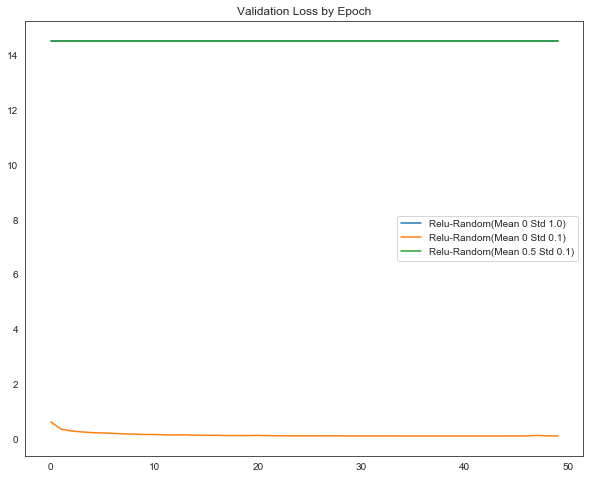

In [86]:
plt.figure(figsize=(10,8))
plt.plot(history_relu_random1.history['val_loss'], label='Relu-Random(Mean 0 Std 1.0)')
plt.plot(history_relu_random2.history['val_loss'], label='Relu-Random(Mean 0 Std 0.1)')
plt.plot(history_relu_random3.history['val_loss'], label='Relu-Random(Mean 0.5 Std 0.1)')
plt.legend()
plt.title('Validation Loss by Epoch')

# Deep Replay
* How are various layers performing given combinations of initializtion & activation?
* Nice library and publication definitely worth a read!
* Using it here to get intuition about initiatlization & learning
* https://github.com/dvgodoy/deepreplay
* https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404

In [91]:
X, y = dr_load_data(n_dims=10)

In [92]:
def create_model(layers, input_dim, units, activation, initializer):
    model = Sequential()
    model.add(Dense(units=units[0], input_dim=input_dim, 
                   activation=activation, 
                   kernel_initializer=initializer, 
                   name='h1'))
    for i in range(2, layers + 1):
        model.add(Dense(units=units[i - 1], 
                       activation=activation,
                       kernel_initializer=initializer,
                       name=f'h{i}'))
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer=initializer, name='o'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
    return model

In [93]:
def generate(file, group, layers, input_dim, units, activation, initializer, title):
    !rm $file $group
    
    model = create_model(layers=layers, 
                         input_dim=input_dim, 
                         units=units, 
                         activation=activation, 
                         initializer=initializer)
    
    replaydata = ReplayData(X, y, model=model, filename=file, group_name=group)
    replay = Replay(replay_filename=file, group_name=group)

    fig = plt.figure(figsize=(12,6))
    ax_zvalues = plt.subplot2grid((2, 2), (0, 0))
    ax_weights = plt.subplot2grid((2, 2), (0, 1))
    ax_activations = plt.subplot2grid((2, 2), (1, 0))
    ax_gradients   = plt.subplot2grid((2, 2), (1, 1))

    wv = replay.build_weights(ax_weights)
    gv = replay.build_gradients(ax_gradients)
    zv = replay.build_outputs(ax_zvalues, before_activation=True, exclude_outputs=True, include_inputs=False)
    av = replay.build_outputs(ax_activations, exclude_outputs=True, include_inputs=False)

    fig = compose_plots([zv, wv, av, gv], epoch=0, title=title)   

## Sigmoid - Normal (0.01)

rm: sigmoid_std_0.01: No such file or directory


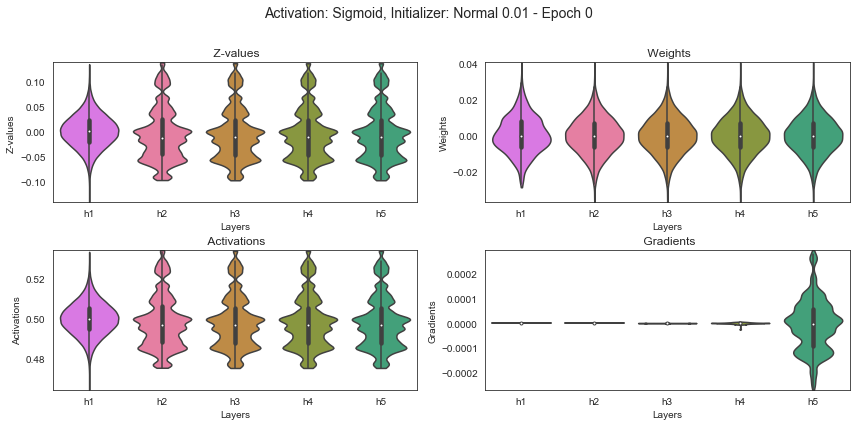

In [94]:
file  = 'weight_init.h5'
group = 'sigmoid_std_0.01'
init  = normal(mean=0, stddev=0.01, seed=1000)
title = f'Activation: Sigmoid, Initializer: Normal 0.01'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='sigmoid', 
         initializer=init,
         title=title)

## Sigmoid - Normal (0.1)

rm: sigmoid_std_0.1: No such file or directory


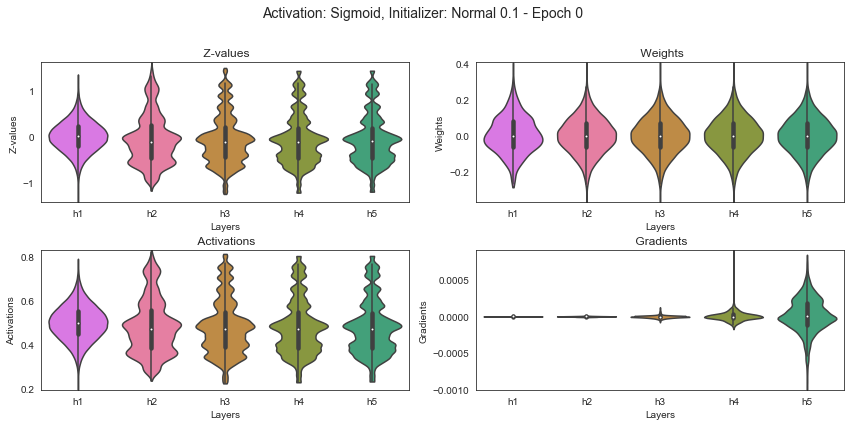

In [95]:
file  = 'weight_init.h5'
group = 'sigmoid_std_0.1'
init  = normal(mean=0, stddev=0.1, seed=1000)
title = f'Activation: Sigmoid, Initializer: Normal 0.1'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='sigmoid', 
         initializer=init,
         title=title)

## Sigmoid - Normal (1.0)

rm: sigmoid_std_1.0: No such file or directory


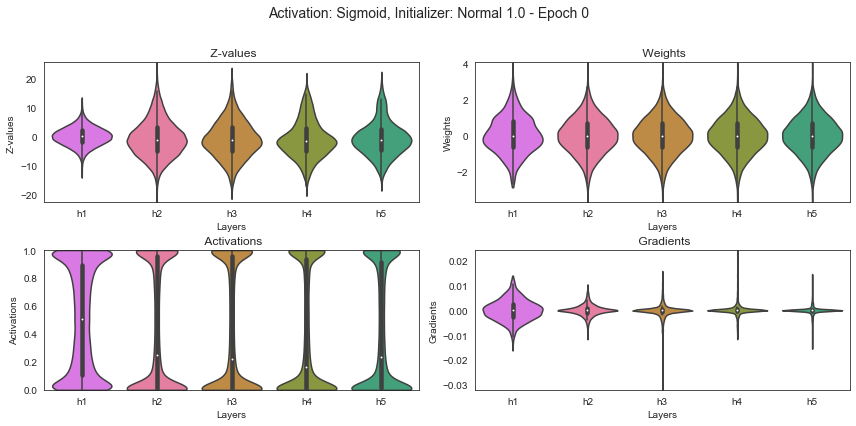

In [96]:
file  = 'weight_init.h5'
group = 'sigmoid_std_1.0'
init  = normal(mean=0, stddev=1.0, seed=1000)
title = f'Activation: Sigmoid, Initializer: Normal 1.0'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='sigmoid', 
         initializer=init,
         title=title)

## Tanh - Normal (0.01)

rm: tanh_std_0.01: No such file or directory


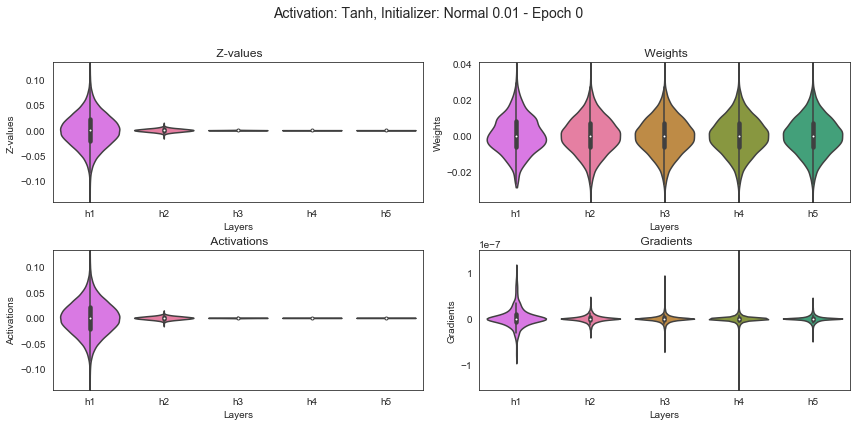

In [97]:
file  = 'weight_init.h5'
group = 'tanh_std_0.01'
init  = normal(mean=0, stddev=0.01, seed=1000)
title = f'Activation: Tanh, Initializer: Normal 0.01'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='tanh', 
         initializer=init,
         title=title)

## Tanh - Normal (0.1)

rm: tanh_std_0.1: No such file or directory


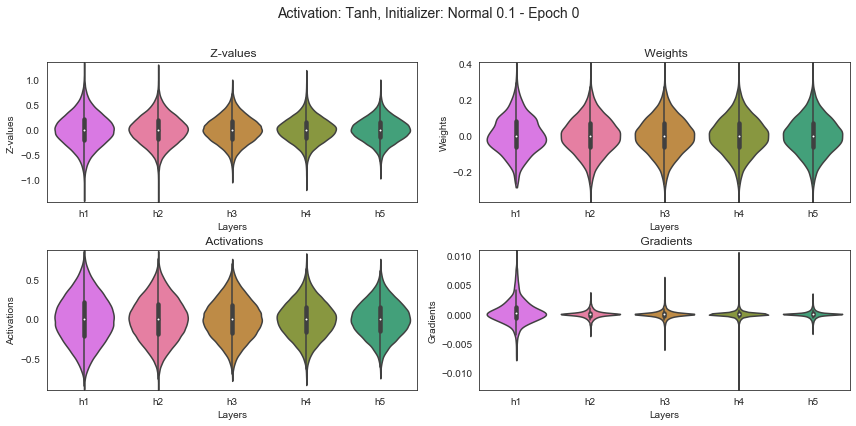

In [98]:
file  = 'weight_init.h5'
group = 'tanh_std_0.1'
init  = normal(mean=0, stddev=0.1, seed=1000)
title = f'Activation: Tanh, Initializer: Normal 0.1'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='tanh', 
         initializer=init,
         title=title)

## Tanh - Normal (1.0)

rm: tanh_std_1.0: No such file or directory


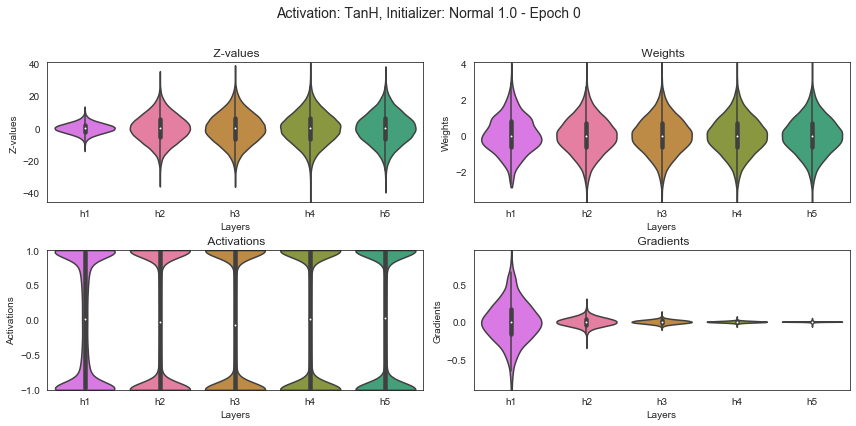

In [99]:
file  = 'weight_init.h5'
group = 'tanh_std_1.0'
init  = normal(mean=0, stddev=1.0, seed=1000)
title = f'Activation: TanH, Initializer: Normal 1.0'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='tanh', 
         initializer=init,
         title=title)

## Relu - Normal (0.01)

rm: relu_std_0.01: No such file or directory


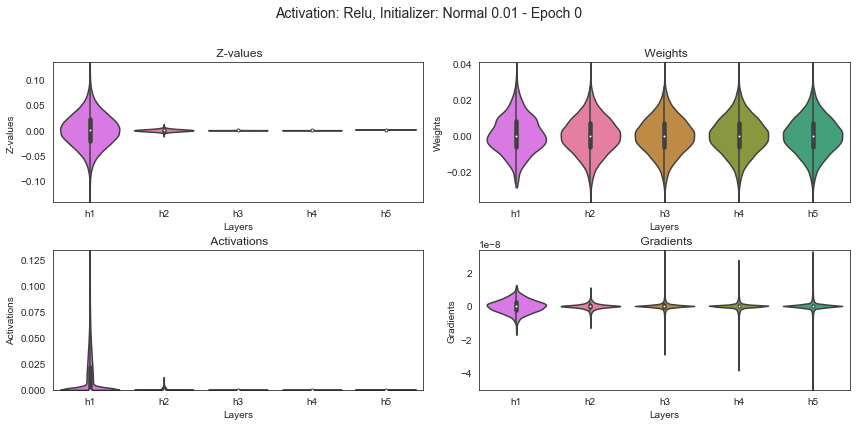

In [100]:
file  = 'weight_init.h5'
group = 'relu_std_0.01'
init  = normal(mean=0, stddev=0.01, seed=1000)
title = f'Activation: Relu, Initializer: Normal 0.01'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Normal (0.1)
* This combination worked well in the Deep Network (96%+ Accuracy)

rm: relu_std_0.1: No such file or directory


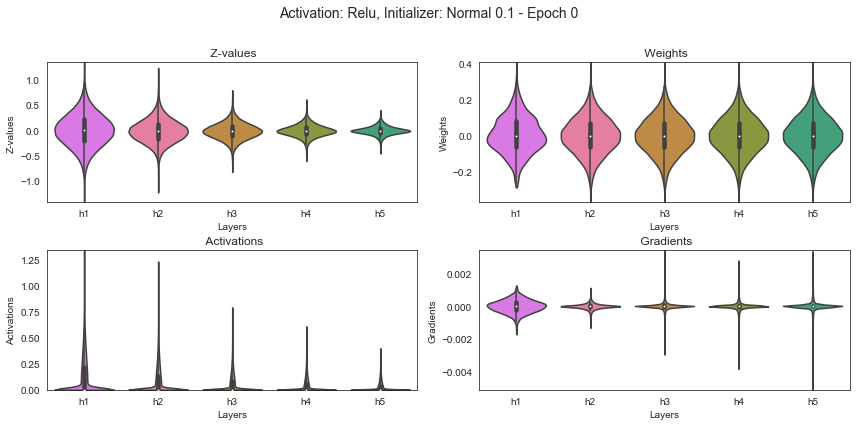

In [101]:
file  = 'weight_init.h5'
group = 'relu_std_0.1'
init  = normal(mean=0, stddev=0.1, seed=1000)
title = f'Activation: Relu, Initializer: Normal 0.1'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Normal (1.0)

rm: relu_std_1.0: No such file or directory


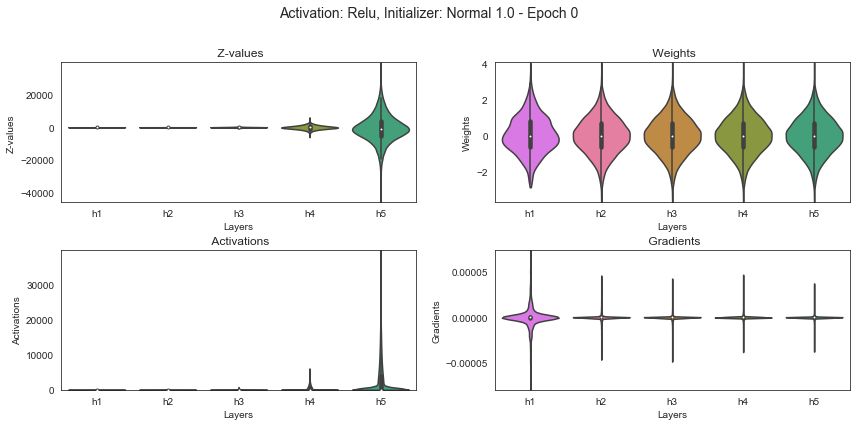

In [102]:
file  = 'weight_init.h5'
group = 'relu_std_1.0'
init  = normal(mean=0, stddev=1.0, seed=1000)
title = f'Activation: Relu, Initializer: Normal 1.0'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Glorot Normal

rm: relu_glorot_normal: No such file or directory


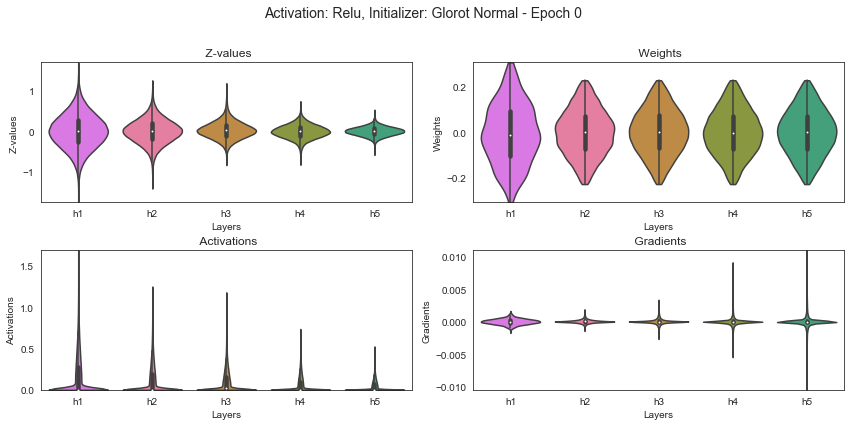

In [103]:
file  = 'weight_init.h5'
group = 'relu_glorot_normal'
init  = keras.initializers.glorot_normal()
title = f'Activation: Relu, Initializer: Glorot Normal'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Glorot Uniform

rm: relu_glorot_uniform: No such file or directory


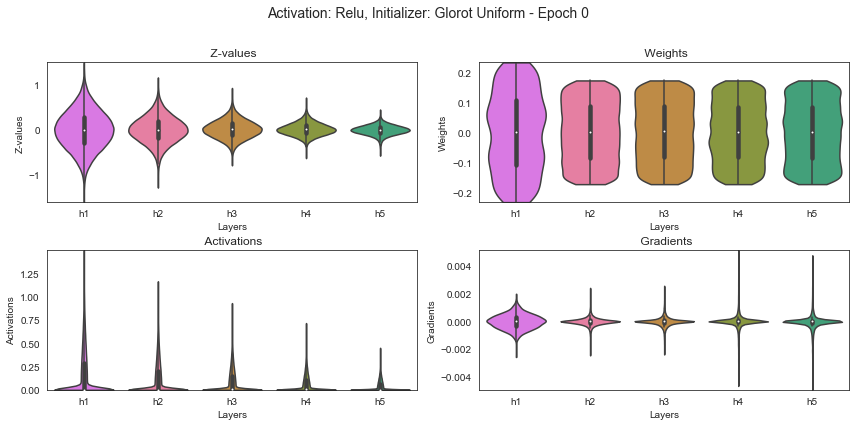

In [104]:
file  = 'weight_init.h5'
group = 'relu_glorot_uniform'
init  = keras.initializers.glorot_uniform()
title = f'Activation: Relu, Initializer: Glorot Uniform'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Kaiming He Normal

rm: relu_he_normal: No such file or directory


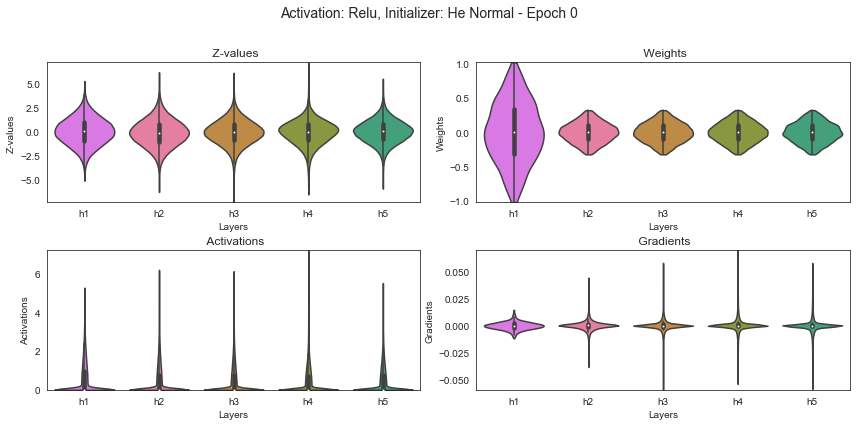

In [105]:
file  = 'weight_init.h5'
group = 'relu_he_normal'
init  = keras.initializers.he_normal()
title = f'Activation: Relu, Initializer: He Normal'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

## Relu - Kaiming He Uniform

rm: relu_he_uniform: No such file or directory


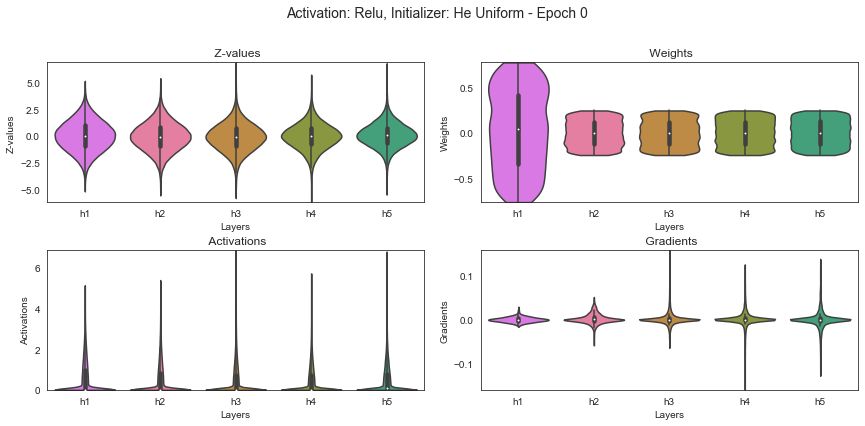

In [106]:
file  = 'weight_init.h5'
group = 'relu_he_uniform'
init  = keras.initializers.he_uniform()
title = f'Activation: Relu, Initializer: He Uniform'
generate(file, group, 
         layers=5, 
         input_dim=10, 
         units=[100, 100, 100, 100, 100], 
         activation='relu', 
         initializer=init,
         title=title)

# Conclusion
* Weight initialization is important to learning
    * Avoid initializing to zeros & ones (failed learning)
    * Random values work but you need a good standard deviation
    * Deeper the net, the more sensitive learning is to initiatlization
* Recommendation
    * Centered around 0, standard deviation based on number inputs / outputs
    * Glorot / Kaiming He perform well
    * Kaiming He - perhaps better with deeper nets